**«Проблема качества данных»**


**Цель: применить на практике методы по оценке качества данных.**
**Описание задания:**
Необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравните полученные результаты. Значение метрики должно улучшиться.

**Этапы работы:**

1) Получите и загрузите данные.

2) Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберите и посчитайте метрику качества.

3) Снова загрузите полные данные.

4) Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

5) Проверьте данные на наличие пропущенных значений.

a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

6)Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

7) Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

8)*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

9)*Попробуйте математически преобразовать признак Age.

10) Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

11) Сформулируйте выводы по проделанной работе.
a) Кратко опишите какие преобразования были сделаны и почему.
b) Сравните метрики моделей из п. 2 и п. 10.
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образом исследовать и дополнять действительно большие данные?

Результат: применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.

**1) Получите и загрузите данные.**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2) Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберите и посчитайте метрику качества.**

In [ ]:
# Информация о датасете:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Пропущенные значения имеются в колонках 'Age', 'Cabin', 'Embarked'.
Категориальные переменные: 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'.

In [ ]:
# Создадим копию исходного датасета с именем data1:
data1 = data.copy(deep = True)
data1[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Удаление категориальных переменных
data1 = data1.drop(columns = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
data1[:3]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250


In [ ]:
# Подсчет количества пропусков
data1.isnull().sum().sum()

177

In [ ]:
# Удаление пропущеных значений
data1 = data1.dropna()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


Обучение модели

In [ ]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()

In [ ]:
# Датафреймы с признаками и целевой переменной
X_data1 = data1[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y_data1 = data1['Survived']

In [ ]:
model_1.fit(X_data1, y_data1)

LogisticRegression()

Метрика качества - score (подходит для задач классификации).

In [ ]:
model_1.score(X_data1, y_data1)

0.7086834733893558

**3) Снова загрузите полные данные.**

In [ ]:
# Исходный датасет не менялся:
data[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**4) Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.**

In [ ]:
# Копия исходного датасета для данной задачи - data2:
data2 = data.copy(deep=True)
data2[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Для построения модели удалим следующие признаки:

* 'PassengerId' - ID пассажиров (т.к. это просто номер строки данного датасета);
* 'Name' - имена пассажиров (приставки Mr, Mrs, т.д., косвенно указывающие на статус и возраст, для данного датасета, думаю, можно не учитывать, т.к. есть колонки с классом билета, возрастом и полом);
* 'Ticket' - номер билета (возможно, символы номера означают то, что может быть важным, но такой информации у меня нет);
* 'Cabin' - кабина (т.к. пропусков много, а информативной ценности мало).   



Остальные признаки могут быть связаны с эмоциональными, социальными и др. факторами, влияющими на исход спасения пассажира.

In [ ]:
# Удаление признаков, описанных выше:
data2 = data2.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])
data2[:3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


**5) Проверьте данные на наличие пропущенных значений.**

In [ ]:
data2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.**

In [ ]:
# Размер датасета с пропущенными значениями:
data2.shape

(891, 8)

In [ ]:
# После удаления пропусков в датасете останется 183 строки (объекта) из 891.
data_tmp = data2.dropna()
data_tmp.shape

(712, 8)

In [ ]:
# В процентах после удаления пропусков останется
data_tmp.shape[0] * 100 / data2.shape[0]

79.91021324354658

Если удалить все пропуски, будет потеряно около 20% данных.

**b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.**

In [ ]:
# Стат.данные о датасете:
data2.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


Признаки, среди которых имеются пропущенные значениями, в порядке уменьшения количества пропусков: 'Age' и 'Embarked'.
Начнем с 'Age': заполним средним значением.

In [ ]:
data2.loc[data2[data2['Age'].isna()].index , 'Age'] = data2['Age'].mean()

Пропуски в 'Embarked' заполним модой.

In [ ]:
data2.loc[data2[data2['Embarked'].isna()].index , 'Embarked'] = data2['Embarked'].mode()

In [ ]:
data2[:3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


**6) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.**


Категориальные переменные: 'Sex' и 'Embarked'. Для перевода в цифровые значения воспользуемся pd.get_dummies.

In [ ]:
data2 = pd.get_dummies(data2)
data2[:3]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1


**7) Проверьте данные на наличие выбросов.**

**a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.**

По выведенным выше стат.данным выбросов на первый взгляд нет. Но построим боксплоты для колонок 'Age' и 'Fare'.

<Axes: >

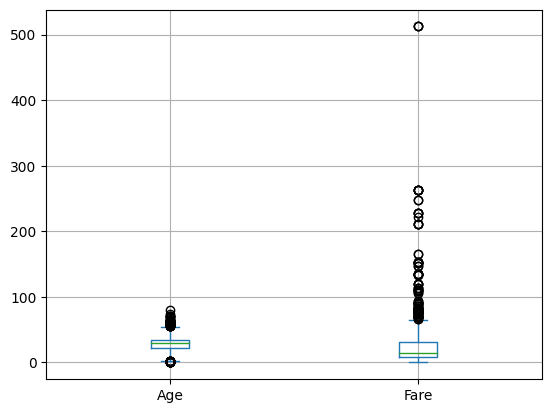

In [ ]:
data2[['Age', 'Fare']].plot(kind='box', grid=True)

Исходя из графиков: возраст в пределах разумного. Одно из значений стоимости билета сильно отличается от остальных (>500).

In [ ]:
# Найдем индекс строки с максимальной стоимостью билета:
data2.Fare.sort_values().tail()

438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, dtype: float64

В датасете имеется три билета с ценой 512,3292, цена у всех трех одинаковая,  поэтому выбросом данное значение считать не будем.

**8) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)**

Посмотрим, повлияла ли стоимость билета на возможность спастись.

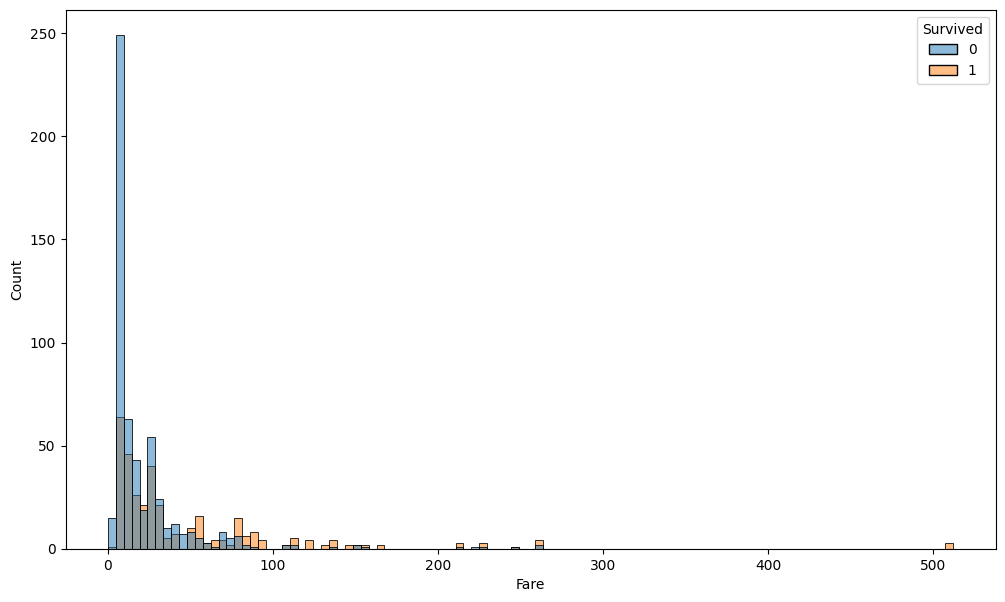

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(data2, x = 'Fare', hue = 'Survived')
plt.show()

Среди пассажиров с дешевыми билетами погибших больше, чем выживших. Пассажиры с самыми дорогими билетами спаслись все. Среди людей, чьи билеты стоили в районе 100 и выше, выживших больше, чем погибших.

**9) *Попробуйте математически преобразовать признак Age.**

Значения возраста для большинства объектов намного больше единицы, поэтому в качестве математического преобразования возраста можно выбрать нормализацию (Min-Max).

In [ ]:
data2[:3]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1


Выполнить данное преобразование можно с помощью инструментов библиотеки sklearn, но можно и вручную:

In [ ]:
# Признак с преобразованным возрастом назовем 'New_age':
data2['New_Age'] = (data2.Age - data2.Age.min()) / (data2.Age.max() - data2.Age.min())
data2[:3]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,New_Age
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0.271174
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0.472229
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0.321438


In [ ]:
# Теперь значения возраста находятся в диапазоне от 0 до 1:
data2['New_Age'].min(), data2['New_Age'].max()

(0.0, 1.0)

**10) Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.**

In [ ]:
# Датасет с признаками (в нем возраст оставим преобразованный) и целевая переменная:
X_data2 = data2.drop(columns=['Survived', 'Age'])
y_data2 = data2['Survived']

In [ ]:
model_2 = LogisticRegression()

In [ ]:
model_2.fit(X_data2, y_data2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Новое значение метрики:
model_2.score(X_data2, y_data2)

0.8035914702581369

In [ ]:
# Продублируем полученное ранее значение метрики:
model_1.score(X_data1, y_data1)

0.7086834733893558

После удаления пропусков и перевода категориальных данных в числовые точность предсказаний повысилась на 10%.

**11) Сформулируйте выводы по проделанной работе.**

**a) Кратко опишите какие преобразования были сделаны и почему.**

**b) Сравните метрики моделей из п. 2 и п. 10.**

**c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?**

a) Выполненные преобразования:
- удаление неинформативных признаков, удаление признаков с большим количеством пропусков;
- замена пропущенных значений в оставленных признаках;
- преобразование категориальных переменных в числовые;
- нормализация числового признака (в качесте математического преобразования).

b) Первоначально метрика составила примерно 70%, после преобразований выросла до 80%.

c) Подготавливать данные при построении моделей машинного обучения необходимо, т.к. это повышает их качество и, как следствие, эффективность работы выбранного алгоритма машинного обучения.

*При работе с действительно большими данными положительный эффект в некоторых случаях может дать дополнение датасета, в других - удаление части признаков. В рамках каждого случая необходимо искать компромисс между ресурсами оборудования, располагаемым временем и приемлемым результатом...